# Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from plotly import graph_objects as go

import warnings
warnings.filterwarnings('ignore')

### Data Collection

In [3]:
df = pd.read_excel('store_return.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.shape

(9994, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Checking for null values

In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Correlation

In [7]:
df.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


Wall time: 3.08 s


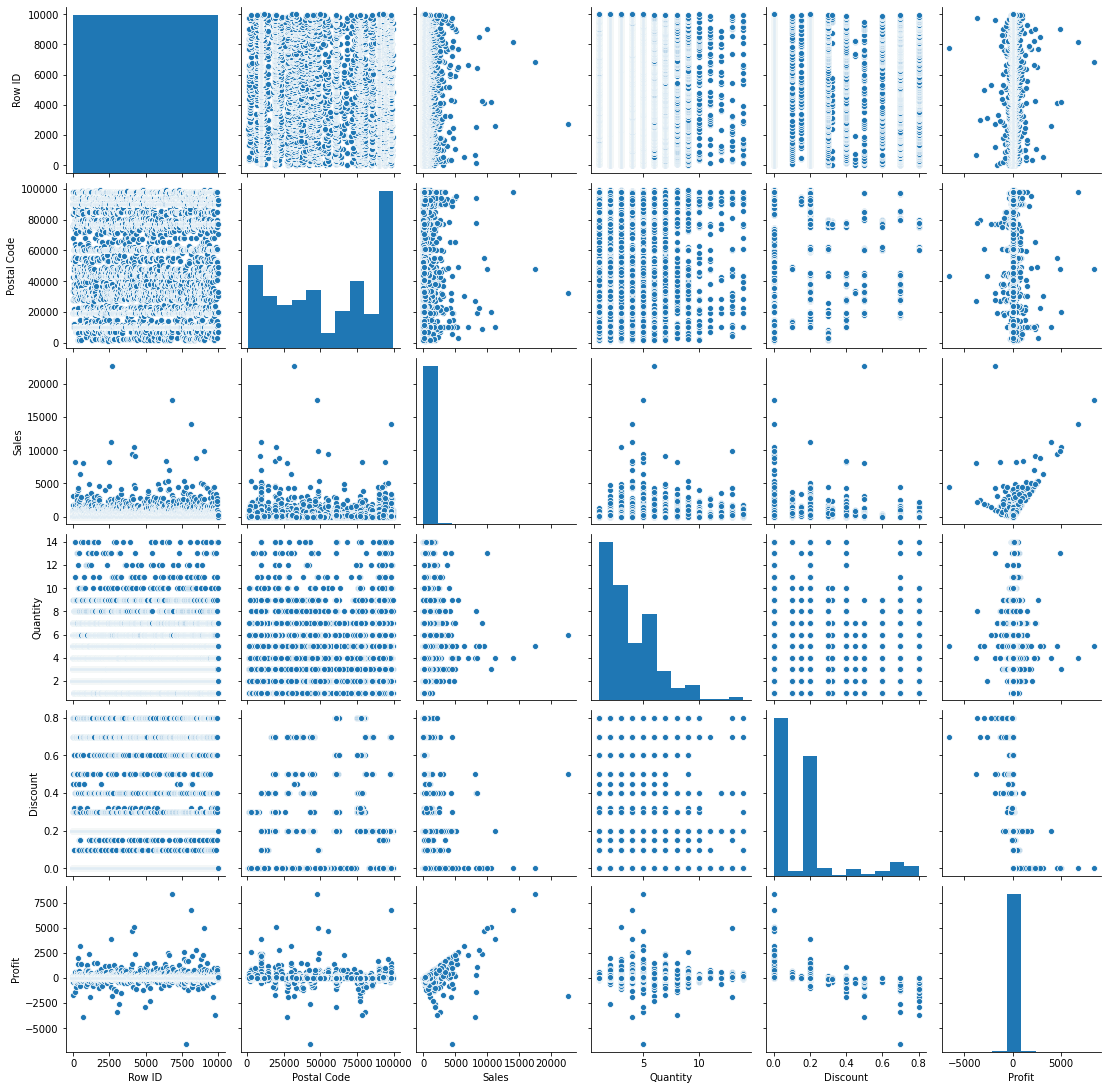

In [8]:
%%time
sns.pairplot(df)

### Correlation Matrix with Heatmap

In [9]:
# Since the above table is repetitive ; in order to see only the single value; thisis done
mask1 = np.zeros_like(df.corr()) # This will create a table of 0 similar to the size of Data.corr()
triangle_indices= np.triu_indices_from(mask1) #
mask1[triangle_indices] = True # This will make the top triangle values true
mask1

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

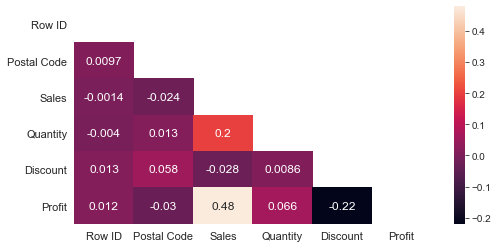

In [11]:
plt.figure(figsize=[8,4])
sns.heatmap(df.corr(), mask = mask1, annot=True, annot_kws={"size":12})
# annot is use to display the values of the relations
# annot_kws (Keyword_size) is use to change the size
sns.set_style('white')

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

## Plotting Function

In [12]:
def plot(df, col,title):
    sns.set(style="darkgrid")
    x=df[col].value_counts()
    x=x.reset_index()
    x[col]=100*x[col]/sum(x[col])
    x=x.sort_values(col)
    x=x[x[col]>1]
    ax = sns.barplot(x="index", y=col, data=x,orient="v")
    plt.xticks(rotation='vertical')

    plt.title(title)
    plt.xlabel('Percentage')
    plt.tight_layout()
    plt.show()

### Plotting Individual Features

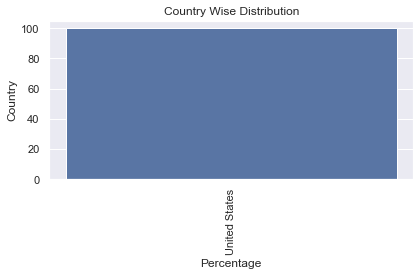

In [14]:
plot(df, 'Country', 'Country Wise Distribution')

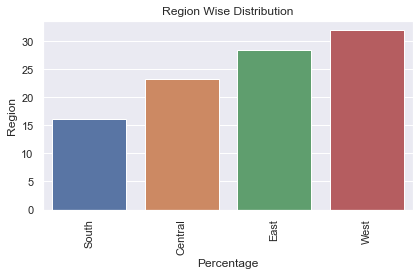

In [15]:
plot(df, 'Region', 'Region Wise Distribution')

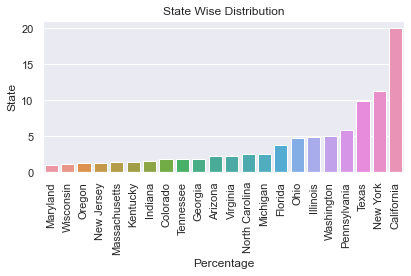

In [16]:
plot(df, 'State', 'State Wise Distribution')

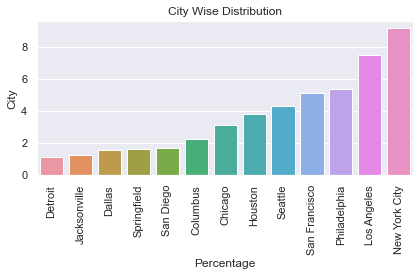

In [13]:
plot(df, 'City', 'City Wise Distribution')

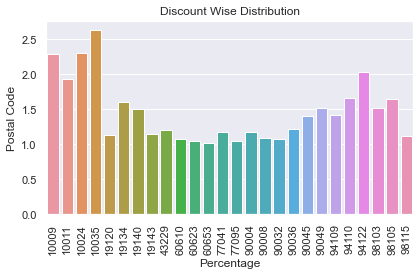

In [17]:
plot(df, 'Postal Code', 'Discount Wise Distribution')

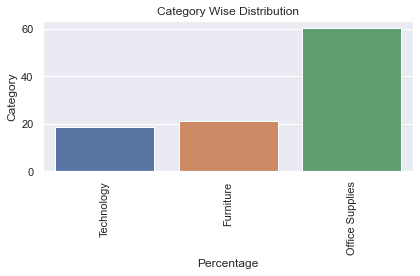

In [18]:
plot(df, 'Category', 'Category Wise Distribution')

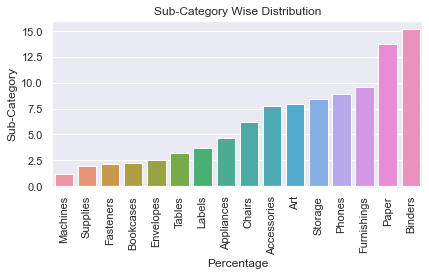

In [19]:
plot(df, 'Sub-Category', 'Sub-Category Wise Distribution')

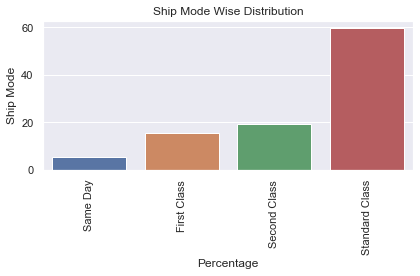

In [20]:
plot(df, 'Ship Mode', 'Ship Mode Wise Distribution')

## Plotting two features

In [25]:
df.groupby(['Segment','Ship Mode']).size().reset_index().groupby('Segment')[[0]].max()

,0
Segment,
Consumer,3085
Corporate,1812
Home Office,1071


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


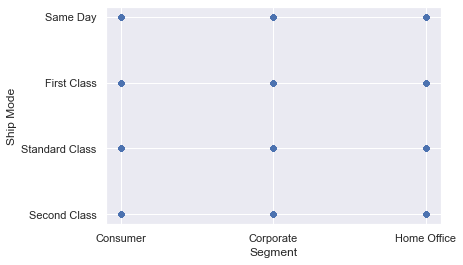

In [37]:
# Scatter plot
df.plot(x='Segment', y='Ship Mode', kind='scatter')
plt.show()

<Figure size 360x216 with 0 Axes>

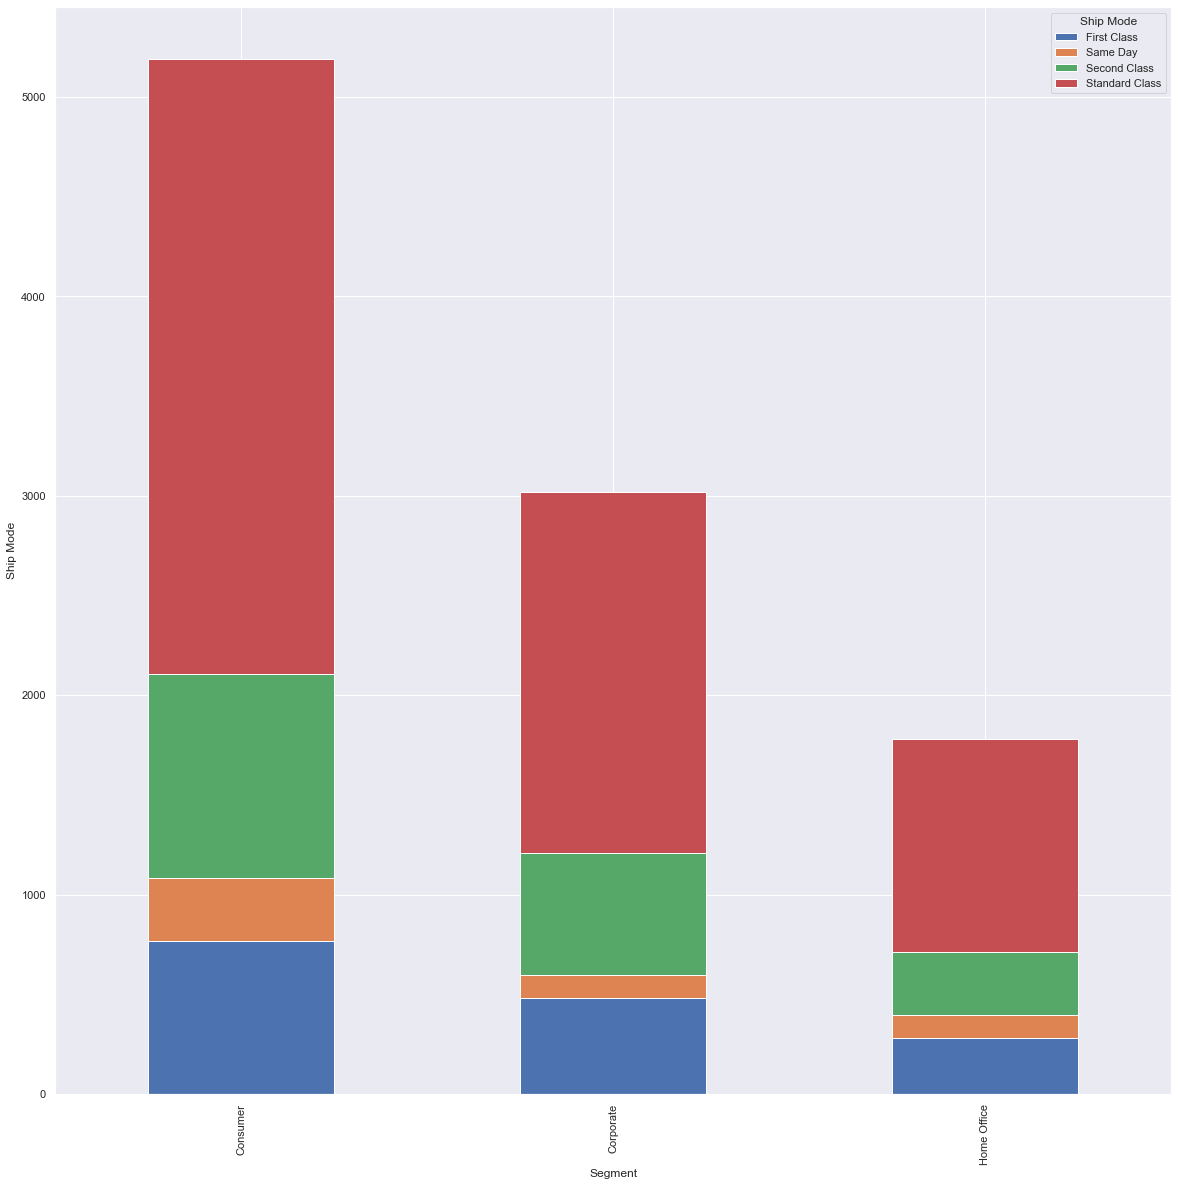

In [21]:
res = df.groupby(['Segment','Ship Mode']).size().unstack()

plt.figure(figsize=[5,3])
res.plot(kind='bar', stacked=True,figsize=(20,20))
plt.xlabel('Segment')
plt.ylabel('Ship Mode')

plt.show()

In [27]:
df.groupby(['Region','Category']).size().reset_index().groupby('Region')[[0]].max()

,0
Region,
Central,1422
East,1712
South,995
West,1897


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


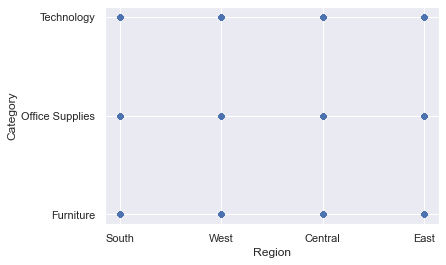

In [36]:
# Scatter plot
df.plot(x='Region', y='Category', kind='scatter')
plt.show()

<Figure size 1296x360 with 0 Axes>

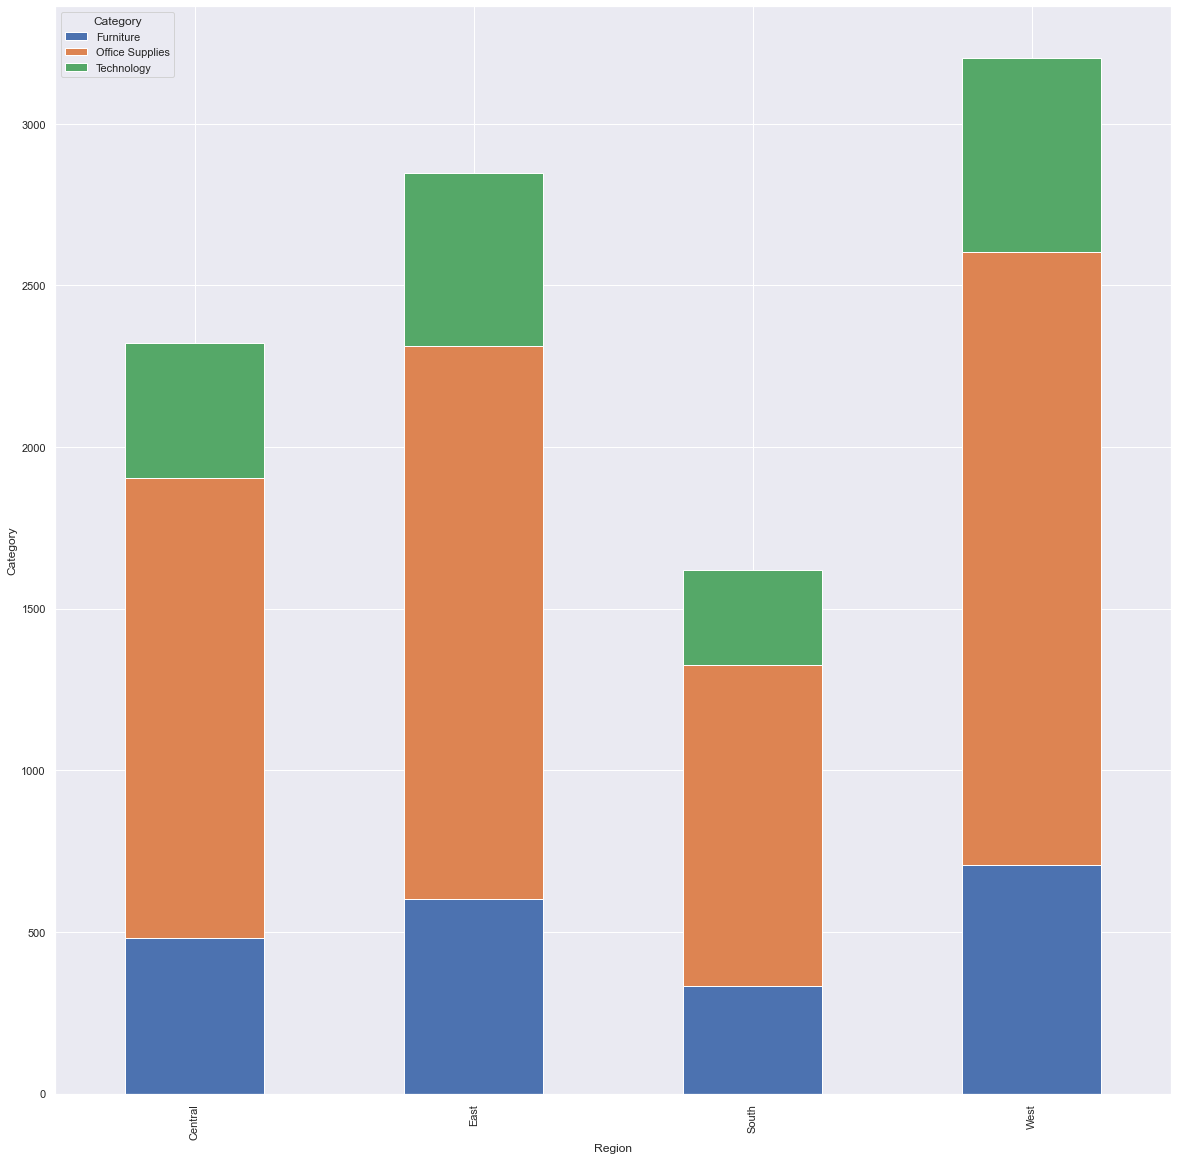

In [24]:
res = df.groupby(['Region','Category']).size().unstack()

plt.figure(figsize=[18,5])
res.plot(kind='bar', stacked=True,figsize=(20,20))
plt.xlabel('Region')
plt.ylabel('Category')

plt.show()

### Plotting top 5 Product

In [28]:
df['Product Name'].value_counts()

Staple envelope                                                  48
Easy-staple paper                                                46
Staples                                                          46
Avery Non-Stick Binders                                          20
Staples in misc. colors                                          19
                                                                 ..
NeatDesk Desktop Scanner & Digital Filing System                  1
Hewlett-Packard Deskjet 3050a All-in-One Color Inkjet Printer     1
RCA ViSYS 25425RE1 Corded phone                                   1
Newell 342                                                        1
Star Micronics TSP100 TSP143LAN Receipt Printer                   1
Name: Product Name, Length: 1850, dtype: int64